<center><b><font size=6>Lab-4 Data Visualization<b><center>

### Objective: Learning basics about visualization using following Python libraries:
1. **Matplotlib** is a comprehensive Python library for data visualization. It's very powerful and highly configurable, but normally it also requires more coding. Useful link: <a href="https://matplotlib.org/stable/">documentation</a>, <a href="https://matplotlib.org/stable/tutorials/index.html">official tutorial</a>, <a href="https://www.w3schools.com/python/matplotlib_pyplot.asp" >additional tutorial</a>.
2. **Seaborn** is an advanced library that creates more appealing visualization. It is built on top of Matplotlib and requires less coding to plot decent figures, but it's less configurable. Useful link: <a href="http://seaborn.pydata.org/tutorial.html">documentation</a>.
3. **Pandas** has built-in functions that integrate Matplotlib to easily plot tabular data. It's similar to the original Matplotlib, but with lightweight manipulation of data. Useful link: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html">documentation</a>. 

In [1]:
# import needed python libraries

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 1. Tutorial
In the tutorial, you will learn the basic of seaborn and pandas built-in functions. On top of that, some common and important types of plots will be introduced.

### 1.1 Seaborn

### 1.1.1 Basic usage

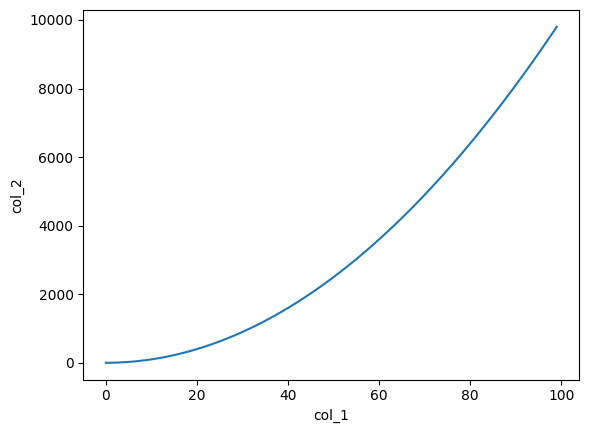

In [2]:
# normally, seaborn works together with pandas dataframe because of easy data manipulation
# seaborn can also work with matplotlib to plot with matplotlib figures

# a simple example to show how you can combine everything together
# refer to http://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot
# in this simple case, the matplotlib part can be deleted
# but in some complex cases, you need matplotlib when special configurations are needed

# create a simple dataframe
x = [i for i in range(100)] # one column of number from 0 to 99
y = [i**2 for i in x] # another column is the square of the previous column
df = pd.DataFrame({
    'col_1' : x, 
    'col_2' : y
})

plt.figure()
sns.lineplot(
    data = df, # which dataframe you want to use as the source data
    x = 'col_1', # which column to use for x-axis
    y = 'col_2', # which column to use for y-axis
    ax = plt.gca() # assign this plot to current axis, not mandatory in this case
)
plt.show()

<Axes: xlabel='bar_name', ylabel='bar_value'>

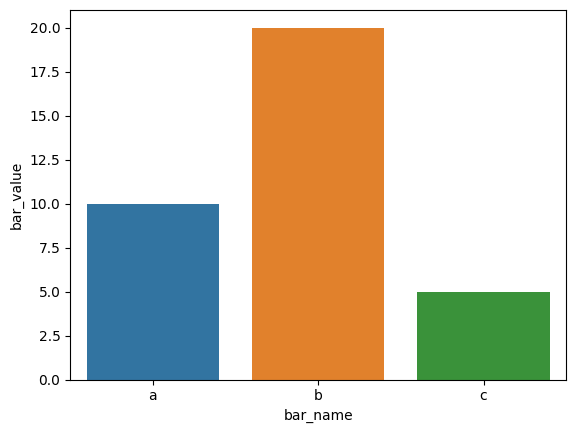

In [3]:
df = pd.DataFrame({
    'bar_name' : ['a', 'b', 'c'], 
    'bar_value' : [10, 20, 5]
})

sns.barplot(
    data = df, # which dataframe you want to use as the source data
    x = 'bar_name', # which column to use for x-axis
    y = 'bar_value' # which column to use for y-axis
)

### 1.1.2 Advanced usage

In [4]:
# in this case, we use a predefined dataset as an example
# load dataset of IRIS flowers, which include the information (4 properties) of three types of flowers
from sklearn import datasets
iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_iris['type'] = 'setosa'
df_iris.loc[50:99, 'type'] = 'versicolor'
df_iris.loc[100:149, 'type'] = 'virginica'
df_iris

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

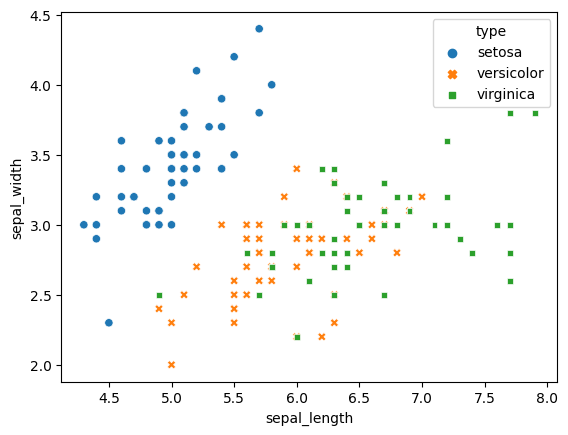

In [5]:
# scatter plot of sepal length and width
# refer to http://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatter#seaborn.scatterplot
# the assignment of different properties (color, label, ...) is done automatically

sns.scatterplot(
    data = df_iris,
    x = 'sepal_length',
    y = 'sepal_width',
    hue = 'type', # assign color to different flower types, the assigned colors are based on column 'type'
    style = 'type' # assign marker style to different flower types, the assigned styles are based on column 'type'
)

### 1.1.3 Introduction of density plot
Visualizing the density of data is crucial and necessary for almost every machine learning task with data processing. Density plot is a way to visualize the distribution of data, helping to understand the condition and context of different numerical values in the dataset. Here I introduce 3 typical density plots, i.e., **boxplot**, **distribution plot**, and **empirical cumulative distribution function (eCDF) plot**, that you can use to visualize the distribution in different ways.

- **Boxplot** is a visualization method that plots and divides the numerical values into different portions according their quartiles. A visual representation is in the following.
![](boxplot.png)
<br>Useful link: <a href="https://en.wikipedia.org/wiki/Box_plot">Wiki</a>, <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot">matplotlib</a>, 
<a href="http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot">seaborn</a>.

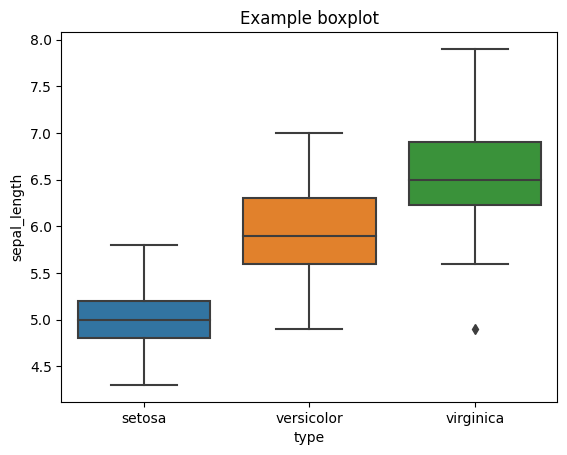

In [6]:
# create a single figure for sepal length with 3 boxplots for the three flowers 

plt.figure()
sns.boxplot(data=df_iris, x='type', y='sepal_length')
plt.title('Example boxplot')
plt.show()

- **Distribution plot** directly and visually assesses the distribution of data. It can be a histogram that describe the frequency of various numerical values or the density estimated by certain functions based on the data. Useful link: <a href="https://seaborn.pydata.org/generated/seaborn.displot.html">displot</a>, 
<a href="https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot">histplot</a>.

<Axes: xlabel='sepal_length', ylabel='Count'>

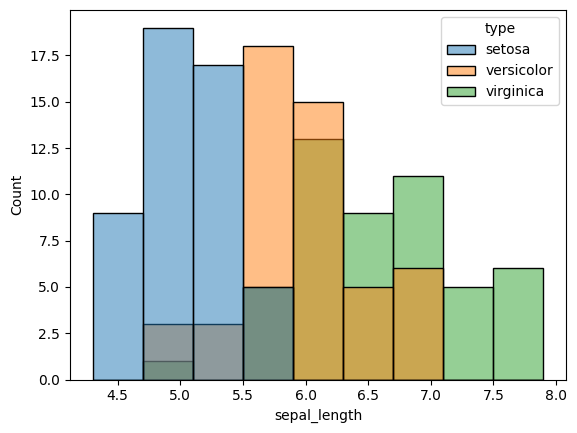

In [7]:
# histogram of the samples in previous boxplot
sns.histplot(
    data = df_iris, 
    x = "sepal_length", # the column you want to check
    hue = "type", # check the distribution of different flower types
    # bins = 10
)

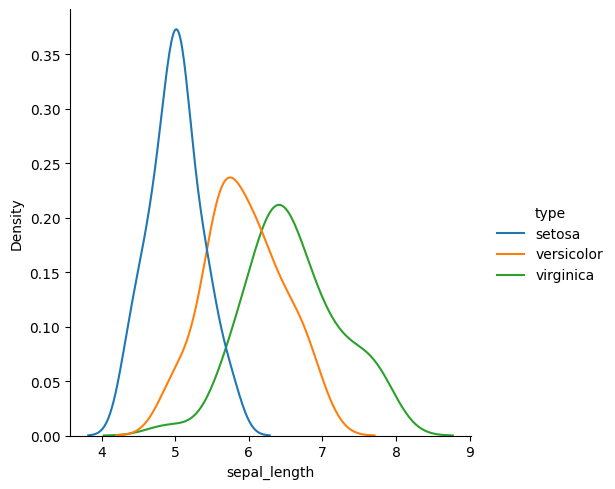

In [8]:
# distribution plot of the samples in previous boxplot
sns.displot(
    data = df_iris, 
    x = "sepal_length", # the column you want to check
    hue = "type", # check the distribution of different flower types
    kind = "kde" # a kernel density estimate (KDE) of the distribution, you can remove this to see the change
)

- **Empirical cumulative distribution function (eCDF)** is simply the cumulative count of data samples following a specific order. It is a step function that count the total number of samples that satisfy the current condition at current step. Useful link: <a href="https://en.wikipedia.org/wiki/Empirical_distribution_function">ECDF</a>, <a href="https://seaborn.pydata.org/generated/seaborn.ecdfplot.html?highlight=ecdfplot">seaborn</a>. 

<Axes: xlabel='sepal_length', ylabel='Proportion'>

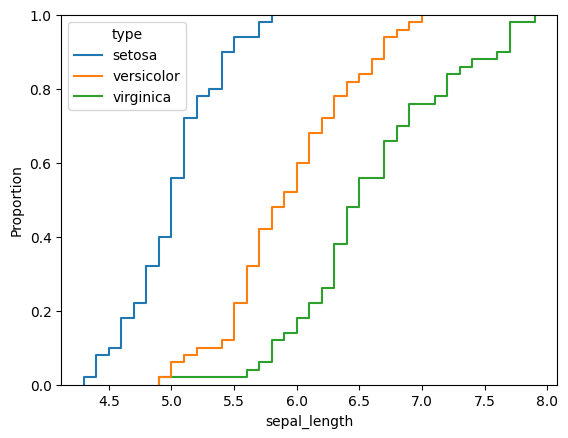

In [9]:
sns.ecdfplot(
    data = df_iris,
    x = 'sepal_length', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
    hue = 'type'
)

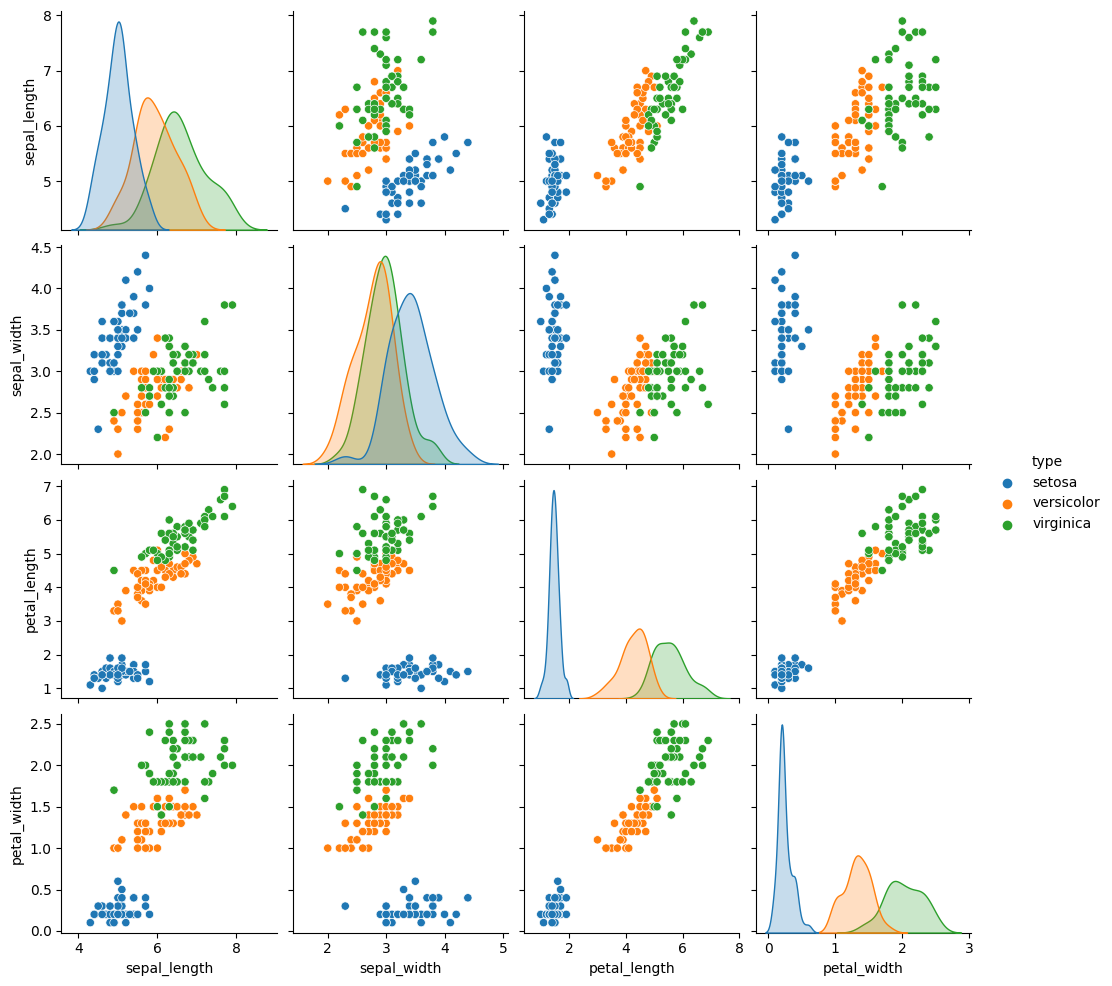

In [10]:
# another example of even more advanced usage that combine scatter plot and density plot 
# multidimensional relationships among the samples

sns.pairplot(df_iris, hue='type')

### 1.2 Pandas built-in functions
Pandas has its own built-in functions that integrate matplotlib to easily make plot. You can do many kinds of plots without data manipulation since data are already there in the dataframe, and can use it for quick visualization or combine with matplotlib and seaborn to make complex plot. Useful link: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html">documentation</a>.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

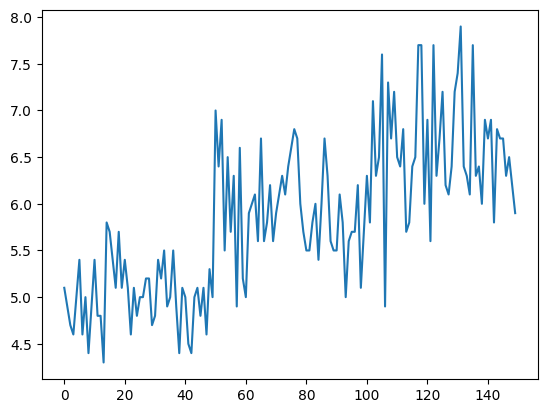

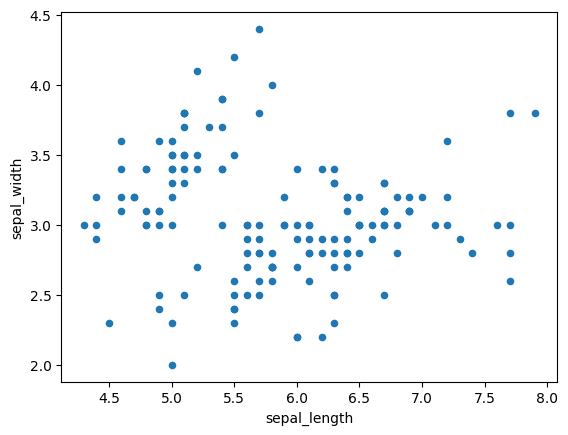

In [11]:
# two examples, only two lines of code

df_iris['sepal_length'].plot() # line plot, it's meaningless in this case
df_iris.plot.scatter('sepal_length', 'sepal_width') # scatter plot

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

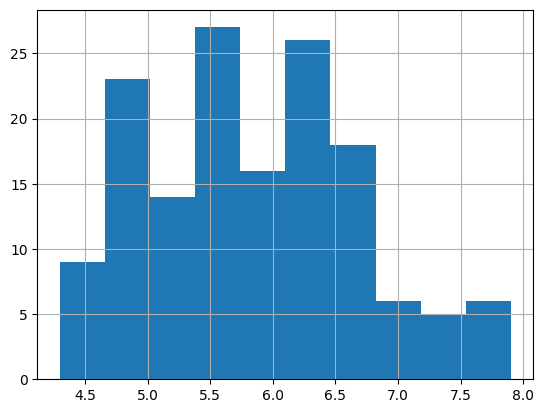

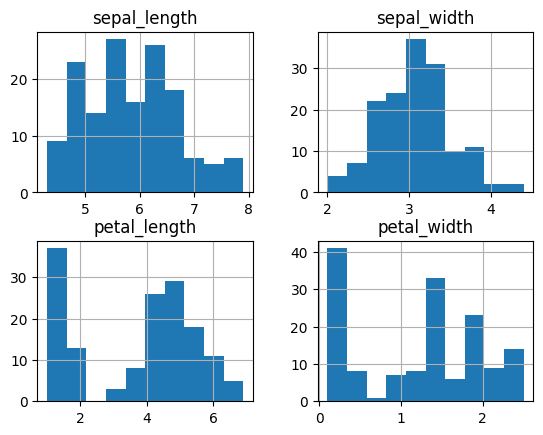

In [12]:
# example of the histogram of all sepal length regardless of the type of flowers, only 1 line of code
df_iris['sepal_length'].hist()

# example of the histogram of sepal length of each type of the flowers in the dataset, only 1 line of code
df_iris.hist()

# The first one is the histogram of a pandas series, while the second one is the histogram of the entire dataframe
# in this second case, the plot will choose all columns existed in the dataframe to visualize everything
# be careful that that in some complex dataframe, certain columns may not be feasible to plot

### IMPORTANT
You are not restricted to use Seaborn!!!<br>Seaborn also works with other data structure!!!

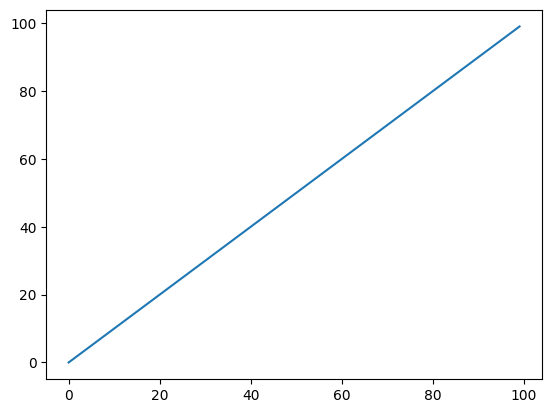

In [13]:
line = [i for i in range(100)]
plt.plot(line)

<Axes: >

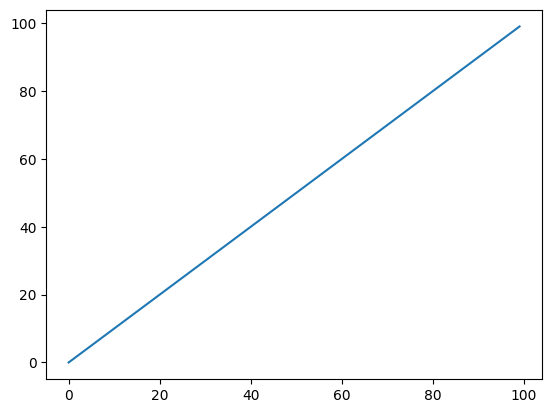

In [14]:
sns.lineplot(line)

### 2. Exercise
- Focus on solving the problem and for now, you don't need to care too much about the details and whether it's appealing or not. In a lot of the following problems, the key point is how to derive the data that you want to plot, requiring the skills you have obtained from previous courses about Python, pandas, numpy, etc.
- The general logic behind making plots is always the same, but you need to learn how to use documentation and online resource to make new or customized plots that you have never seen before.
- Refer to documentation, Google, stackoverflow, chatGPT, etc, and at last, ask me, but I may not be able to give you the answer if all of the previous have failed you.
- Another important step is to compare your answers and the results that I will be providing after the class, so that you will know what you lack, what you can improve, and maybe yours is even better!
- The dataset we will be using is called **Darknet** dataset. Darknets are sensors that observe traffic received by networks that are announced on the Internet but hosting neither production services nor client host. The unsolicited packets received by darknet sensors represent a privileged source of information for network security and debugging activities, exposing threats like scans, brute-force attempts, and misconfigured hosts. The traffic of hundreds of sources target all TCP/UDP ports. The dataset we are using contain the traffic (record of packets) that received by darknet sensors allocated in Polito. You can load the data from ``darknet_traces.csv``, in which there are 8 columns:
    - **ts**: timestamp of the received packet when it is captured by darknet. It's in the format of Unix time, which measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, therefore, you can convert it to human-readable date and time.
    - **src_ip**: IP address of senders (sources) that sent the packet
    - **src_port**: source port from which the packet has been sent
    - **dst_ip**: darknet IP address (destination) reached by the packet
    - **dst_port**: darknet port reached by the packet
    - **proto**: used protocol
    - **pck_len**: length of the packet in bytes
    - **ttl**: time to live of a packet, which represents the limited lifetime of a packet in the network, and is a counter that reduces by 1 every time the packet reaches a router, meaning that the packet will be discarded when it reaches 0. Under the Internet Protocol, TTL is an 8-bit field so the maximum is 255.

<center><img src="darknet.png" alt="drawing" width="1000"/></center>

In [15]:
# read csv file
df_dark = pd.read_csv('darknet_traces.csv')
df_dark

,ts,src_ip,src_port,dst_ip,dst_port,proto,pck_len,ttl
0,1.619827e+09,92.63.196.13,57340,130.192.166.135,11676,tcp,60,243
1,1.619827e+09,172.245.79.122,57026,130.192.166.46,23,tcp,60,235
2,1.619827e+09,1.85.44.226,38567,130.192.166.84,1433,tcp,60,225
3,1.619827e+09,163.172.106.63,47018,130.192.166.197,15467,tcp,60,243
4,1.619827e+09,163.172.106.63,47018,130.192.166.104,15467,tcp,60,243
...,...,...,...,...,...,...,...,...
499995,1.619854e+09,45.144.214.11,50689,130.192.166.10,3040,tcp,60,244
499996,1.619854e+09,167.248.133.69,7831,130.192.166.158,2002,tcp,60,32
499997,1.619854e+09,92.63.196.13,57340,130.192.166.30,14528,tcp,60,243
499998,1.619854e+09,80.82.70.118,60000,130.192.166.247,1701,tcp,60,247


##### 2.1 Plot the number of received packets per minute
1. Line plot: from the beginning to the end, for each minute following the chronological order, count the number of received packets within the corresponding minute. Afterwards, making a time series plot - the number of packets with respect to the timestamp. Try to change the time aggregation (e.g., 30s) to see the change.
    1. Convert the column of timestamp to nanosecond by multiplying $10^9$.
    2. Change the data type of timestamp from float to datetime by using `pd.to_datetime()`.
    3. Set the timestamp column as index.
    4. Use `.resample()` (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html?highlight=resample#pandas.DataFrame.resample">documentation</a>) to aggregate samples into the corresponding minute, and then count the samples in each minute (the logic is similar to `.groupby()`).
3. Distribution plot: visualize the distribution of number of packets per minute, using **histogram with KDE**.
4. Answering the following questions:
    - Can you observe some trends or abnormal behaviors in the plots? 
    - In which plot can you observe the most frequent number of packets, what are these numbers?
    - Describe the difference when you modify the time aggregation. What remains similar?

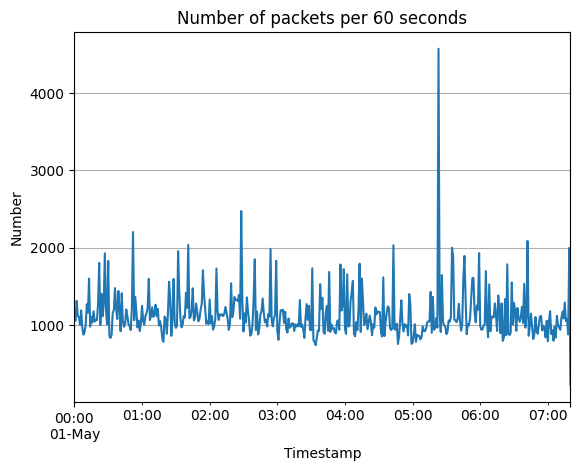

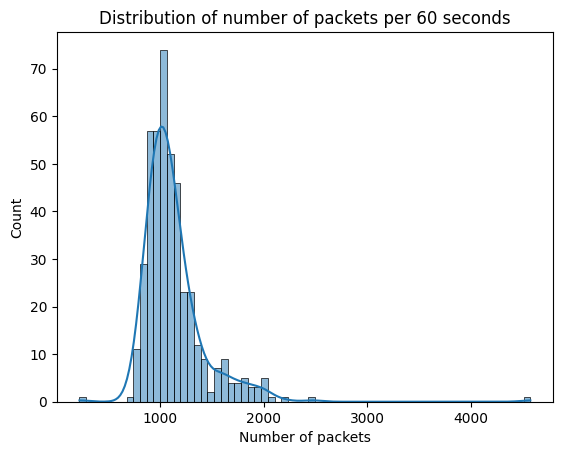

In [16]:
df_dark_copy = df_dark.copy() # in this way, you do not have the risk of changing the original data
df_dark_copy['ts'] = df_dark_copy['ts'] * 1e9 # convert second to millisecond
df_dark_copy['ts'] = pd.to_datetime(df_dark_copy['ts']) # change to datetime, you can check out how the dataframe looks like
df_dark_copy.set_index('ts', inplace=True) # set the timestamp as index
num_sec = 60
df_result = df_dark_copy.resample(f'{num_sec}S').count() # the reuslt of counted number, you can check out how it looks like

# line plot
plt.figure()
# for each 60s, count the number of rows, that are the number of packets
df_result['src_ip'].plot() 
plt.xlabel('Timestamp')
plt.ylabel('Number')
plt.title(f'Number of packets per {num_sec} seconds')
plt.grid()
plt.show()

# distribution plot
plt.figure()
sns.histplot(data=df_result, x='src_ip', kde=True)
plt.xlabel(f'Number of packets')
plt.title(f'Distribution of number of packets per {num_sec} seconds')
plt.show()

##### 2.2 Plot the number of packets per minute for the top 5 source IP address. Find the top 5 source IP addresses with the most sent packets, and make the following plots, indicating the total number of packets for each IP in the legend:
1. Repeat the previous line plot for each of the top 5 IP, specify the colors and labels.
2. Repeat the previous distribution plot for each of the top 5 IP, you can choose to plot in the same figure or in different figures.
3. Plot the ECDF of number of packets for each of the top 5 source IP address.
4. Answering the following questions:
    - Which kind of unique information can you derive from each plot that you cannot derive from others?
    - Can you observe some IP addresses with similar patterns? Can you observe such similarities in all plots, if you can, describe them?
    - Can you roughly observe the order of the total number of packets in the plots? Actually there're some minutes that have a lot of packets for the IP with the lowest amount of total packets (find them in the plots), why do you think such IP has less packets in the end? Can you observe the reason in the plots?

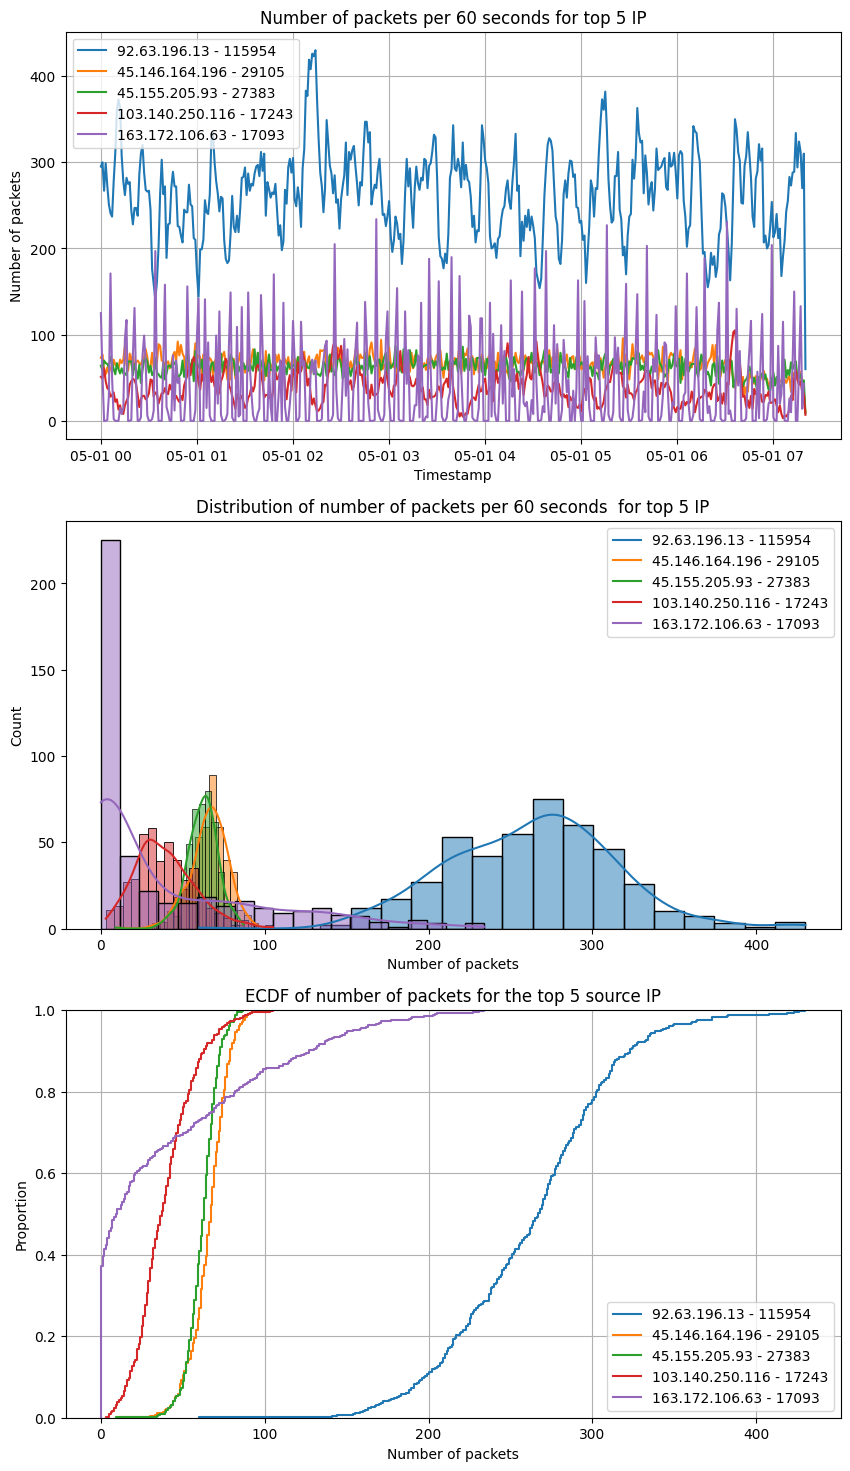

In [17]:
# derive the top 5 IP addresses
ip_top5 = df_dark.groupby('src_ip').count().sort_values(by='ts', ascending=False).index[:5]

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
num_packets = []
for ip in ip_top5:
    df_ip = df_dark_copy[df_dark_copy.src_ip == ip]
    num_packets.append(len(df_ip))
    axs[0].plot(df_ip.resample(f'{num_sec}S').count()['src_ip'], label=f'{ip} - {len(df_ip)}') # line plot
    sns.histplot(data=df_ip.resample(f'{num_sec}S').count(), x='src_ip', kde=True, bins=20, ax=axs[1]) # distribution plot
    sns.ecdfplot(df_ip.resample(f'{num_sec}S').count()['src_ip'], ax=axs[2]) # ECDF plot
axs[0].legend()
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Number of packets')
axs[0].set_title(f'Number of packets per {num_sec} seconds for top 5 IP')
axs[0].grid()
axs[1].set_xlabel('Number of packets')
axs[1].set_title(f'Distribution of number of packets per {num_sec} seconds  for top 5 IP')
axs[1].legend([f'{ip_top5[i]} - {num_packets[i]}' for i in range(len(ip_top5))])
axs[2].legend([f'{ip_top5[i]} - {num_packets[i]}' for i in range(len(ip_top5))])
axs[2].set_xlabel('Number of packets')
axs[2].set_title('ECDF of number of packets for the top 5 source IP')
axs[2].grid()
plt.show()

##### 2.3 Study the frequency of specific links
1. A link is defined as a specific and unique tuple composed of source IP, source port, destination IP, and destination port.
2. Find the number of packets belonging to each individual link.
3. Find the top 10 links with the most amount of packets.
4. Check the frequency of each link by computing the time elapsed between the recorded times (timestamps) of each pair of consecutive packets for a link. Such time span is called **intertime**, which can describe how frequent a link is sending packets, the lower the time, the higher the frequency. Specifically:
    1. Plot the time series of packets for the top 10 links, by making a scatter plot, in which x-axis is the timestamp and y-axis is from 1 to 10, each representing a link. The scatters that represent packets of a link are plot lying on a horizontal line following the timestamp. On top of that, for the label of y-axis, replace digit numbers with the corresponding link tuple (name) plus the number of packets. In this case, you don't need to calculate intertime.
    2. Make the boxplot of intertimes for each link in one single plot. The labels on x-axis should indicate the name of the link and the number of packets as what you have done in previous plot for y-axis. Change the scale of y-axis to logarithm scale. In this case, you need to calculate the intertimes for each link and remove value 0.
5. Answering the following questions:
    - Which plot is more suitable to derive the most frequent link?
    - Roughly, which link lasts the longest/shortest duration?
    - For which link can you observe the outliers in intertimes for both plots?
    - Which link has the most uniform intertimes?

In [18]:
# find the top 10 links with most packets
# each element of the result is a tuple of source IP & port and destination IP & port
link_top_10 = df_dark.groupby(['src_ip', 'src_port', 'dst_ip', 'dst_port']).count().sort_values(by='ts', ascending=False).index[:10]

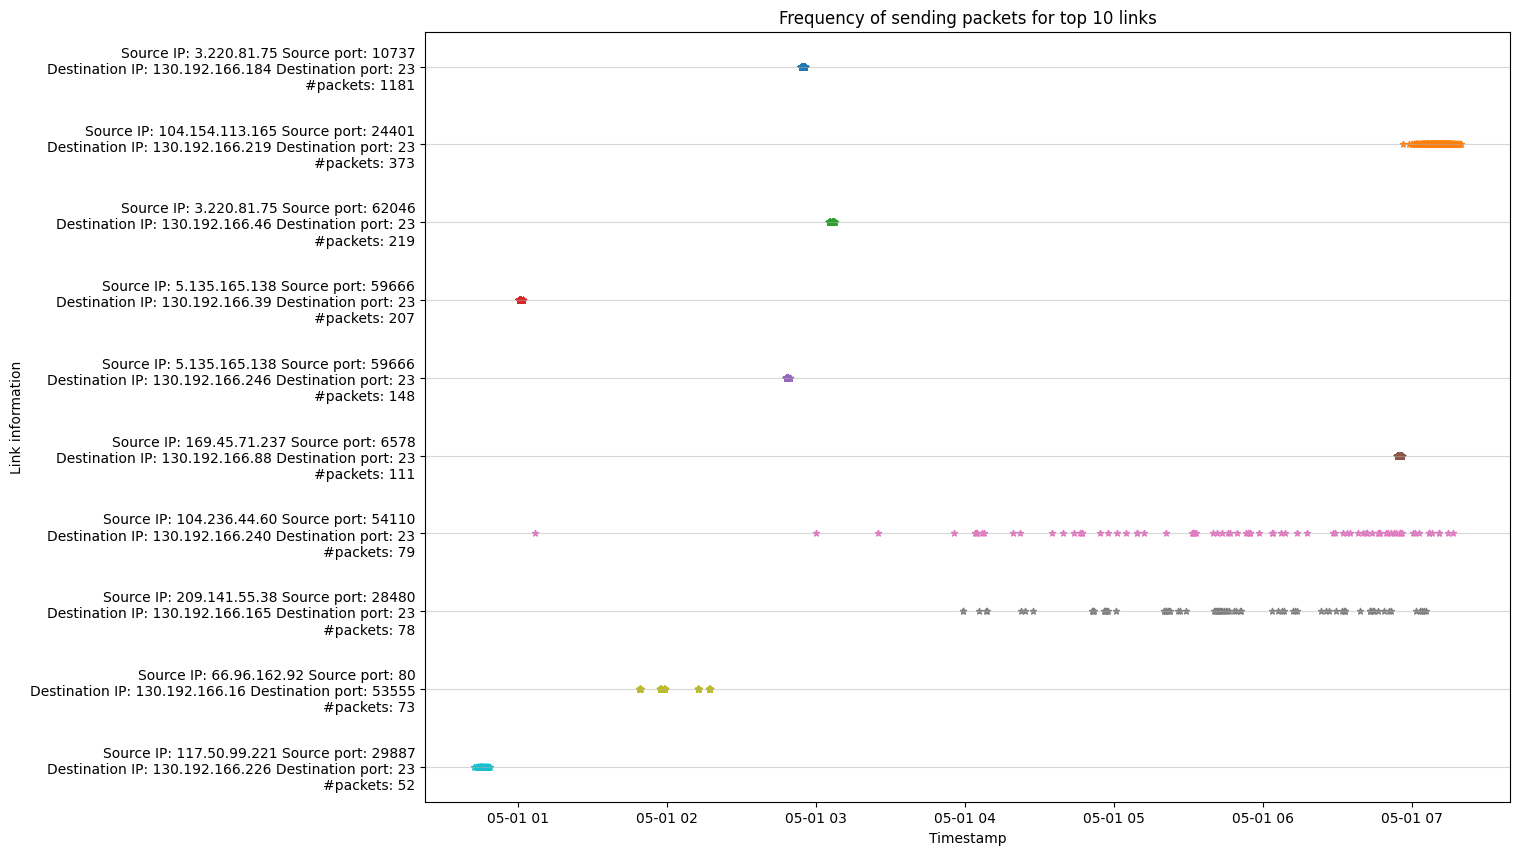

In [19]:
# scatter plot

plt.figure(figsize=(14, 10))
ytick_labels = []
for n, link in enumerate(link_top_10):
    src_ip = link[0]
    src_port = link[1]
    dst_ip = link[2]
    dst_port = link[3]
    df_link = df_dark[
        (df_dark.src_ip == src_ip) &
        (df_dark.src_port == src_port) &
        (df_dark.dst_ip == dst_ip) &
        (df_dark.dst_port == dst_port)
    ]
    plt.scatter(
        pd.to_datetime(df_link['ts']*1e9), # timestamp on x-axis
        [10-n for _ in range(len(df_link))], # the topest one is the link with the most packets
        s = 20, 
        marker = '*'
    )
    # create the label of each link for y-axis
    ytick_label = f'Source IP: {src_ip} ' + \
                  f'Source port: {src_port}\n' + \
                  f'Destination IP: {dst_ip} ' + \
                  f'Destination port: {dst_port}\n' + \
                  f'#packets: {len(df_link)}'
    ytick_labels.append(ytick_label)
plt.xlabel('Timestamp') 
plt.ylabel('Link information')
# the first list the the location of the label
# the second list is the label you want to assign to each location
plt.yticks([x for x in range(10,0,-1)], ytick_labels) 
plt.title('Frequency of sending packets for top 10 links')
plt.grid(axis='y', alpha=0.5)
plt.show()

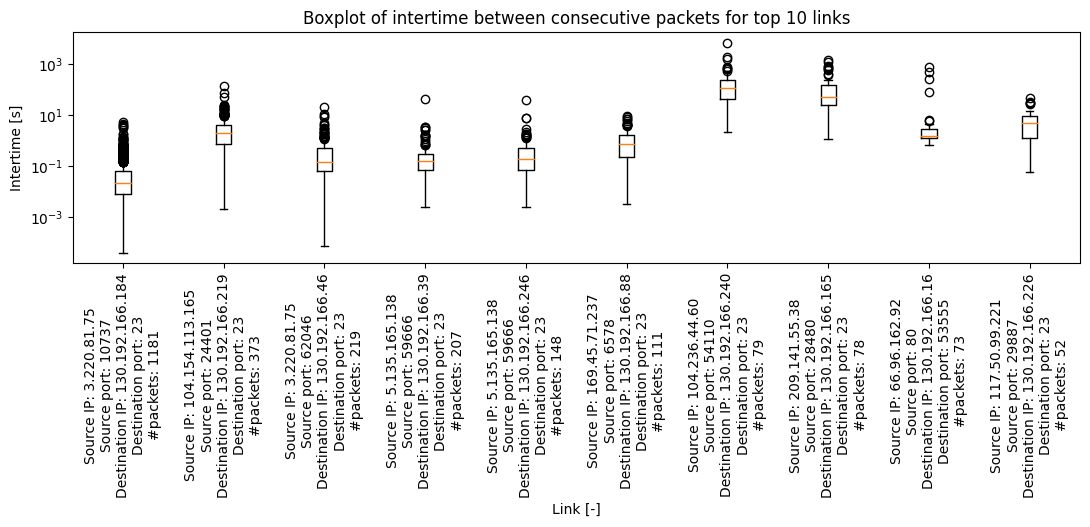

In [20]:
# distribution plot

plt.figure(figsize=(13,3))
plt.title('Boxplot of intertime between consecutive packets for top 10 links')
xlabels = []
for n, link in enumerate(link_top_10):
    # get the dataframe that associated to the link
    src_ip = link[0]
    src_port = link[1]
    dst_ip = link[2]
    dst_port = link[3]
    df_link = df_dark[
        (df_dark.src_ip == src_ip) &
        (df_dark.src_port == src_port) &
        (df_dark.dst_ip == dst_ip) &
        (df_dark.dst_port == dst_port)
    ]
    
    # the intertime between consecutive packets is the difference between consecutive timestamps
    # .diff(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html?highlight=diff#pandas.DataFrame.diff
    intertime = df_link['ts'].diff()[1:].values 
    intertime = intertime[intertime != 0] 

    # make the boxplot
    plt.boxplot(intertime, positions=[n])
    label = f'Source IP: {src_ip}\n' + \
            f'Source port: {src_port}\n' + \
            f'Destination IP: {dst_ip}\n' + \
            f'Destination port: {dst_port}\n' + \
            f'#packets: {len(df_link)}'
    xlabels.append(label)
    
plt.xlabel('Link [-]')
plt.ylabel('Intertime [s]')
plt.yscale('log')
plt.xticks([i for i in range(10)], xlabels, rotation=90)
plt.show()